---
# Covid19 data from [Our World in Data](https://ourworldindata.org/coronavirus)
---
Source: https://github.com/owid/covid-19-data/tree/master/public/data/

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import json

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [92]:
df_covid = pd.read_csv("./covid-19-data/public/data/owid-covid-data.csv")

# They also provide description and source of each column in a separate csv file. 
df_column_description = pd.read_csv("./covid-19-data/public/data/owid-covid-codebook.csv")
df_column_description

,column,source,description
0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Continent of the geographical location
2,location,Our World in Data,Geographical location
3,date,Our World in Data,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Total confirmed cases of COVID-19
5,new_cases,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19
6,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19 (7-day smoothed)
7,total_deaths,COVID-19 Data Repository by the Center for Sys...,Total deaths attributed to COVID-19
8,new_deaths,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19
9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19 (7-day smoot...


## Plotting daily new cases and its 7-day average value (using convolution)

<AxesSubplot:xlabel='date'>

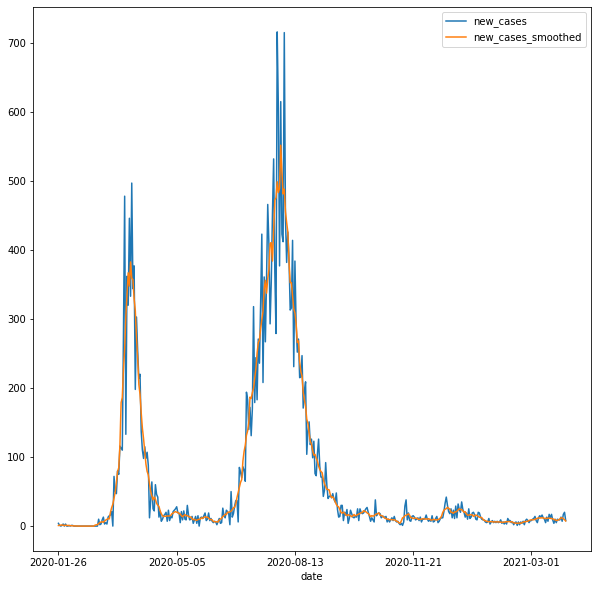

In [57]:
df_covid_austrialia = df_covid[df_covid["location"] == "Australia"].set_index("date").sort_index()

df_covid_austrialia["new_cases_smoothed"] = np.convolve(df_covid_austrialia["new_cases"], np.ones(7), "same") / 7
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_covid_austrialia[["new_cases", "new_cases_smoothed"]].plot(ax=ax)

## Comparing cases across different continent

<AxesSubplot:xlabel='continent'>

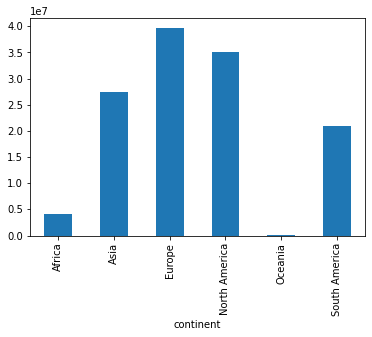

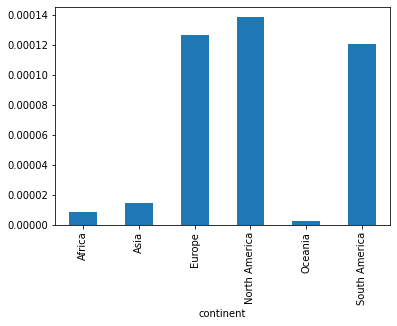

In [93]:
cols = ["continent", "new_cases", "population"]

df_continental_aggregated = df_covid[cols].groupby("continent").agg("sum")
df_continental_aggregated["new_cases"].plot(kind="bar")


# Need to do population size correction
plt.figure()
population_size_corrected = df_continental_aggregated["new_cases"] / df_continental_aggregated["population"]
population_size_corrected.plot(kind="bar")

## New case rate lags behind reproduction rate a little

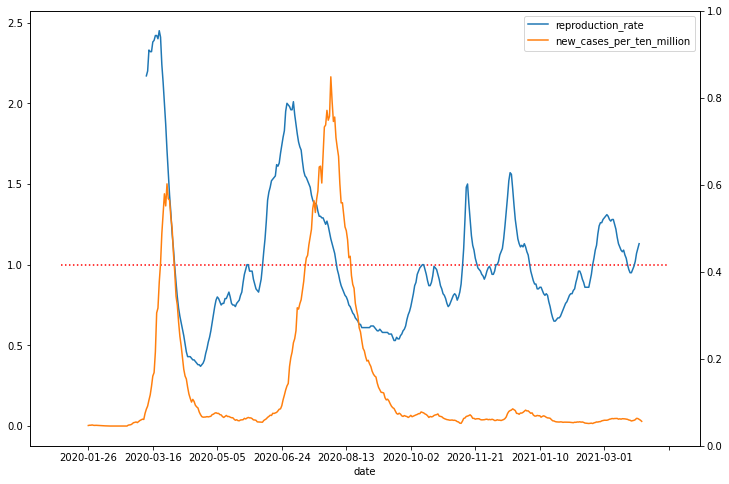

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_covid_austrialia[["reproduction_rate"]].plot(ax=ax)
ax.twinx()
df_covid_austrialia["smoothed_new_cases_per_ten_million"] = (
    np.convolve(df_covid_austrialia["new_cases_per_million"], np.ones(7), "same") / 70
)
(df_covid_austrialia["smoothed_new_cases_per_ten_million"]).plot(ax=ax, label="new_cases_per_ten_million")
ax.legend()

xmin, xmax = ax.get_xlim()
ax.hlines(1.0, xmin, xmax, linestyles="dotted", colors="red")